In [1]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error,accuracy_score
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
#from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

#Data Source
from yahoo_fin import stock_info
import yfinance as yf

In [2]:
df = yf.download("AAPL", start="2010-01-01", end="2022-05-12") # interval='1m'

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442256,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473097,447610800
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.415992,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.343011,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.432482,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.395228,432894000


In [4]:
##Summary Statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3.111000e+03
mean,46.292615,46.787252,45.800019,46.310659,44.512253,2.651923e+08
std,42.907589,43.434071,42.387189,42.927175,43.405764,2.246157e+08
min,6.870357,7.000000,6.794643,6.858929,5.864508,4.100000e+07
25%,18.668750,18.860893,18.513036,18.695536,16.401495,1.069804e+08
50%,28.822500,29.087500,28.502501,28.797501,26.446293,1.780110e+08
75%,51.071249,51.567499,50.698750,51.121250,49.796650,3.612910e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.880998e+09


In [5]:
##Exploring Data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3111 entries, 2010-01-04 to 2022-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3111 non-null   float64
 1   High       3111 non-null   float64
 2   Low        3111 non-null   float64
 3   Close      3111 non-null   float64
 4   Adj Close  3111 non-null   float64
 5   Volume     3111 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.1 KB


In [6]:
##Converting Date to DateTime Object
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442256,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473097,447610800


In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
##Making Date as Index 
df.set_index('Date',inplace=True)

In [9]:
df['Date'] = df.index

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535085,493729600,2010-01-04
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546384,601904800,2010-01-05
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442256,552160000,2010-01-06
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200,2010-01-07
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473097,447610800,2010-01-08


In [11]:
##Checking Null Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

We can eliminate features like Open,Low, High, Adj Close automatically as they are high multicollinear with Close.
We consider Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

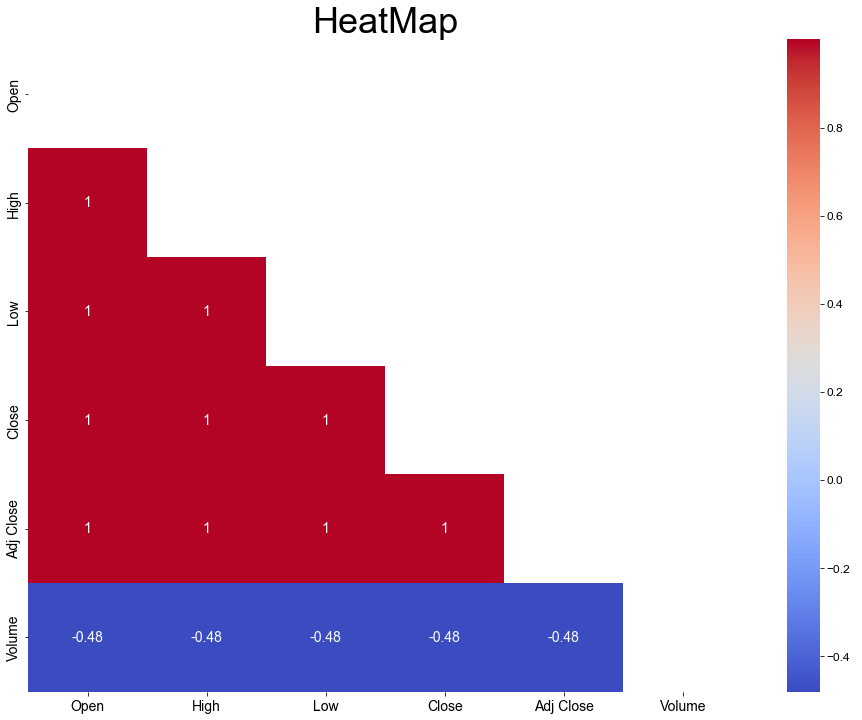

In [12]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(df.corr())
ax = sns.heatmap(df.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()


In [13]:
monthly_mean = df['Close'].resample('M').mean()

In [14]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2010-01-31,7.418402
2010-02-28,7.099850
2010-03-31,7.978960
2010-04-30,8.969592
2010-05-31,8.980768
...,...
2022-01-31,169.861500
2022-02-28,169.830001
2022-03-31,165.310435


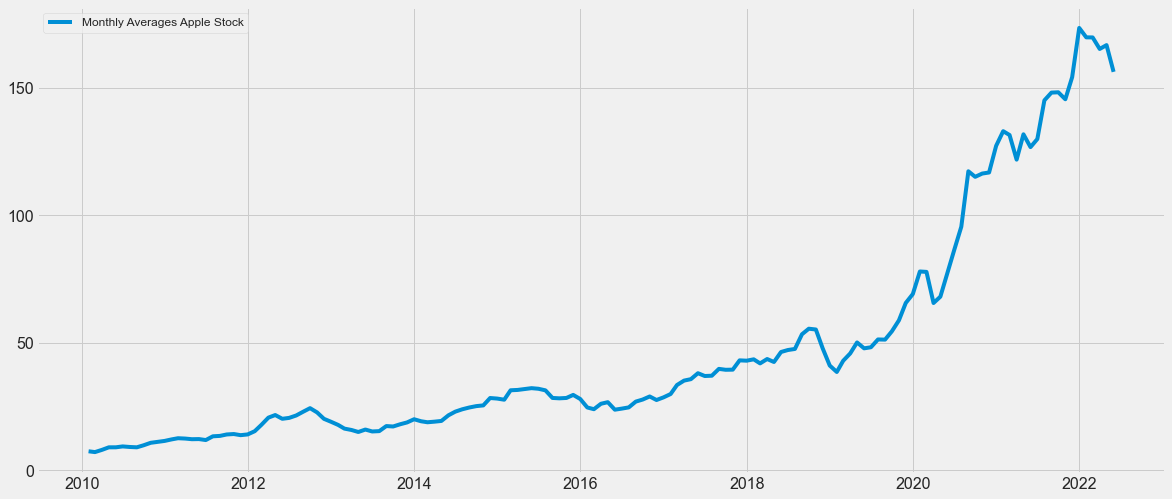

In [15]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

# EDA

In [16]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2010-01-31,7.418402,2010,January,Sunday,1
2010-02-28,7.099850,2010,February,Sunday,1
2010-03-31,7.978960,2010,March,Wednesday,1
2010-04-30,8.969592,2010,April,Friday,2
2010-05-31,8.980768,2010,May,Monday,2
...,...,...,...,...,...
2022-01-31,169.861500,2022,January,Monday,1
2022-02-28,169.830001,2022,February,Monday,1
2022-03-31,165.310435,2022,March,Thursday,1


(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

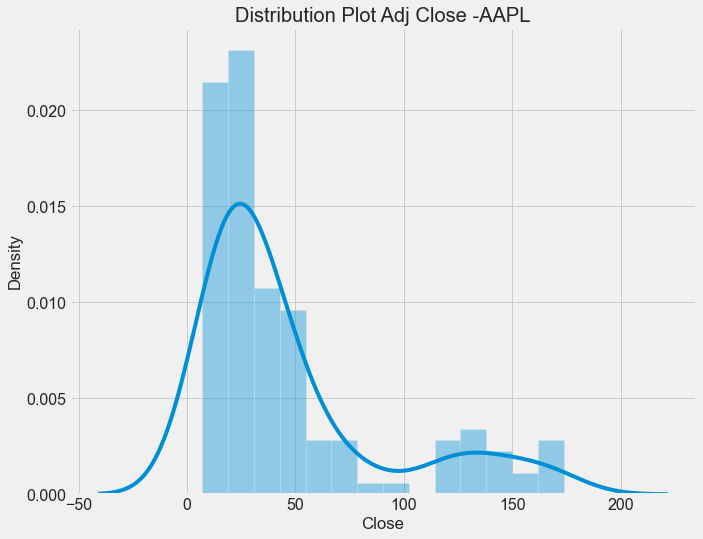

In [17]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Distribution Plot Inference : Distribution shows Right Skew



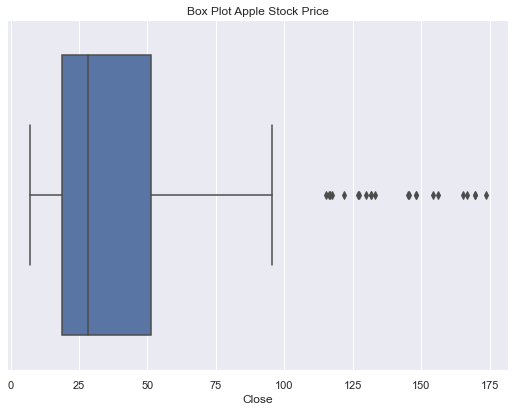

In [18]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


Box-Plot Inference :-

->Distribution shows Right Skew

->Outlier towards the higher end around Stock price of 100$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

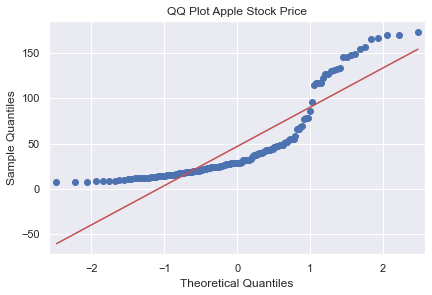

In [19]:
qq_plot = qq(monthly_data['Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

QQ plot Inference :-

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews

->Shows Distribution is Not following Gaussian Normal Distribution

In [20]:
print('Skewness of Distribution is ',monthly_data['Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Close'].kurtosis())

Skewness of Distribution is  1.601329445551746
Kurtosis of Distribution is  1.4275083510645028


Stock Price is Heavily skewed -Right tailed Skewness



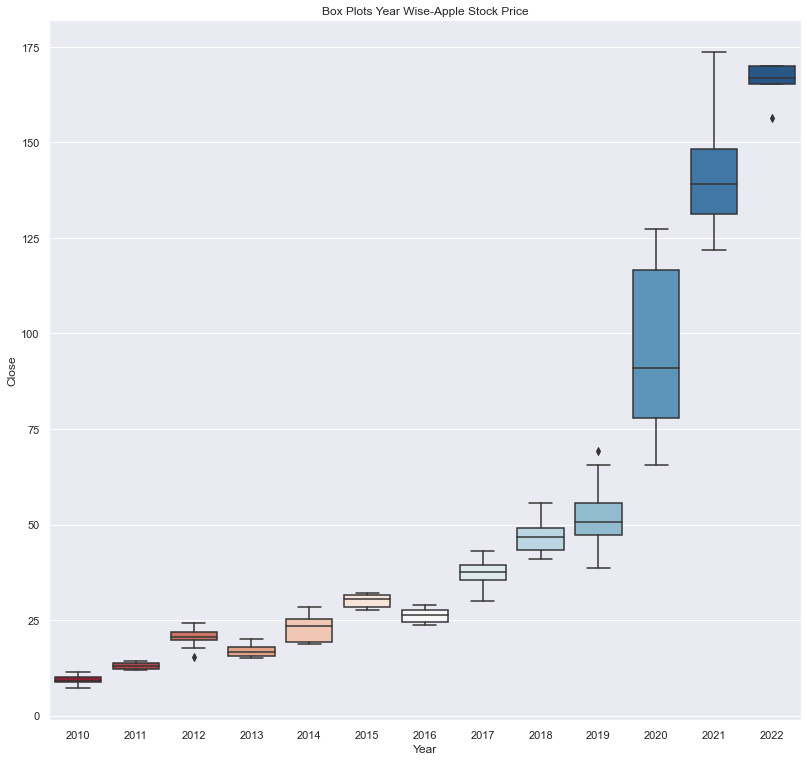

In [21]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

Inferences Box Plot

->Outliers Present in Year 2012, 2019 and 2022

->Lot of Variability in Years 2014, 2017-19, 2020 and 2021.

->2020 most volatile year among all years

->Upward Rising Trend is shown

In [22]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

In [23]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2010': 1.3002728408908268,
 '2011': 1.6175827429408116,
 '2012': 2.0324208248229247,
 '2013': 2.174389696666445,
 '2014': 5.9173962739190245,
 '2015': 3.270408403305783,
 '2016': 3.0881804169432954,
 '2017': 3.9496732664772907,
 '2018': 5.9502020099395025,
 '2019': 8.259799867212138,
 '2020': 38.7790697823301,
 '2021': 17.07149999835383,
 '2022': 4.519565608463239}

Text(0, 0.5, 'InterQuartile Range')

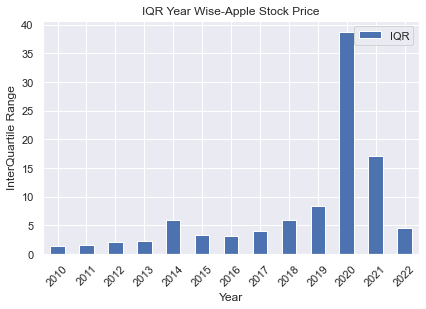

In [24]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')

->When Data is Not Normal Inter-Quartile Range(IQR) is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

->As observed with BoxPlot 2020 anmd 2021 are the most volatile Years for Apple Stock

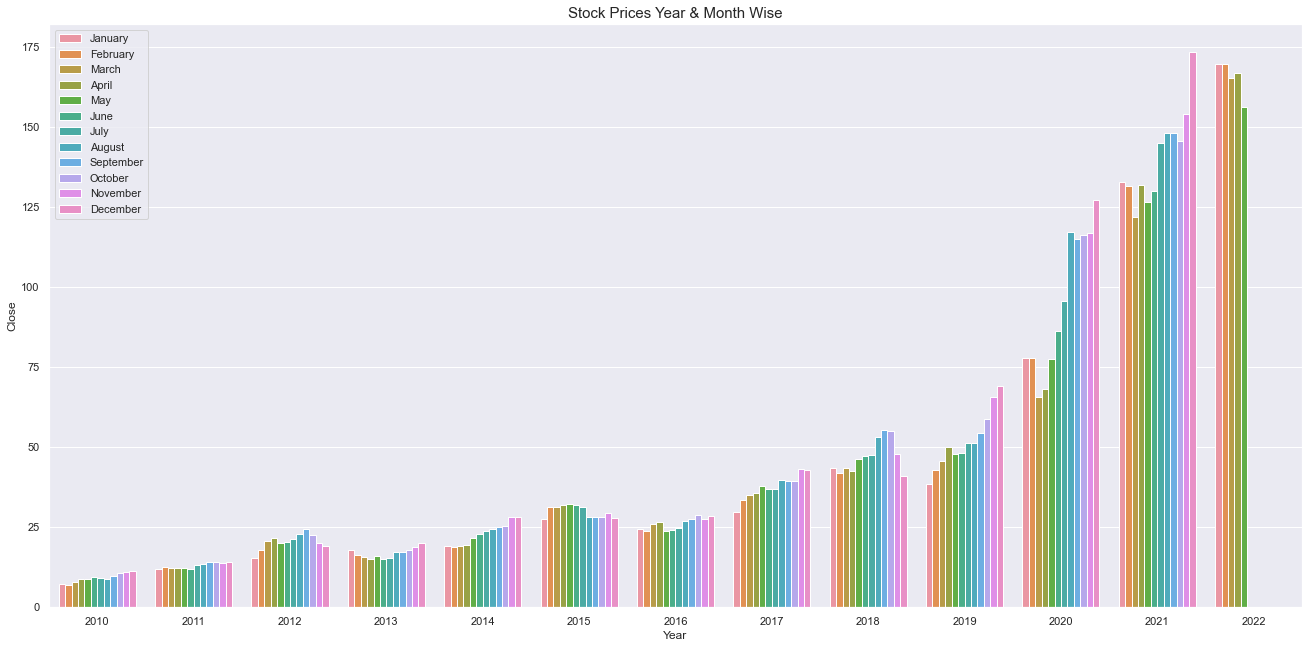

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from August-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time which is the Fall term ,the Wallstreet is excited about upcoming products .

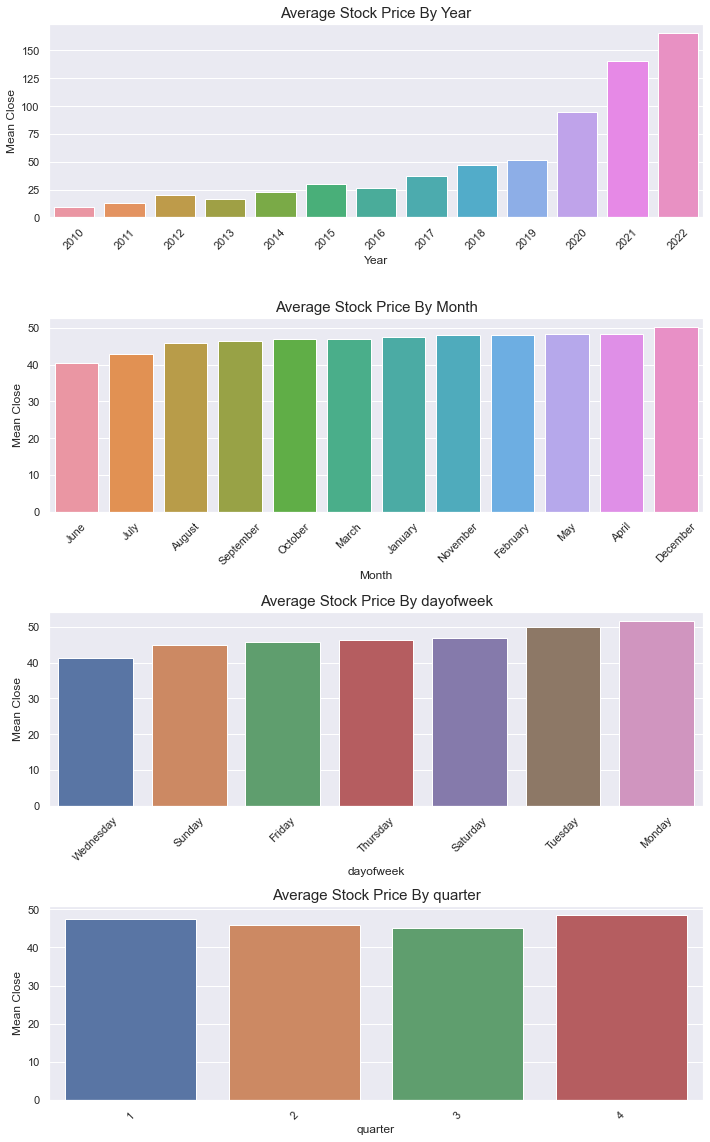

In [26]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

->According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

->Average Stock Price is lower at start of the week in comparision to the end of the week.

->The Average Price is Highest in the Month of December.

->Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

## Decomposition of Time Series


<Figure size 1440x1152 with 0 Axes>

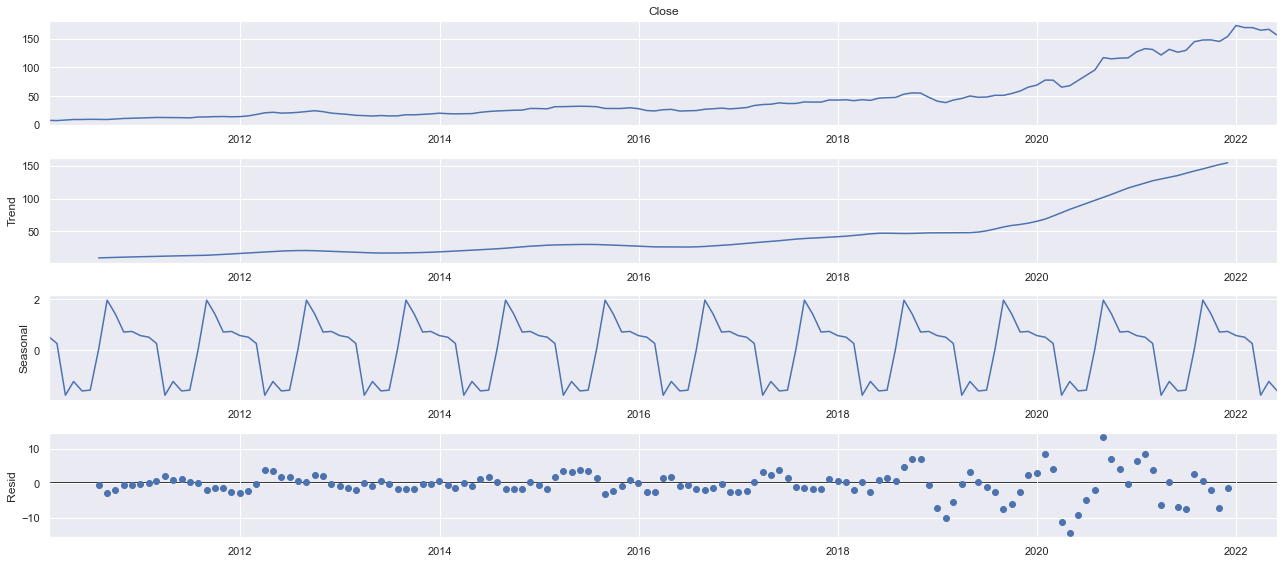

In [27]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

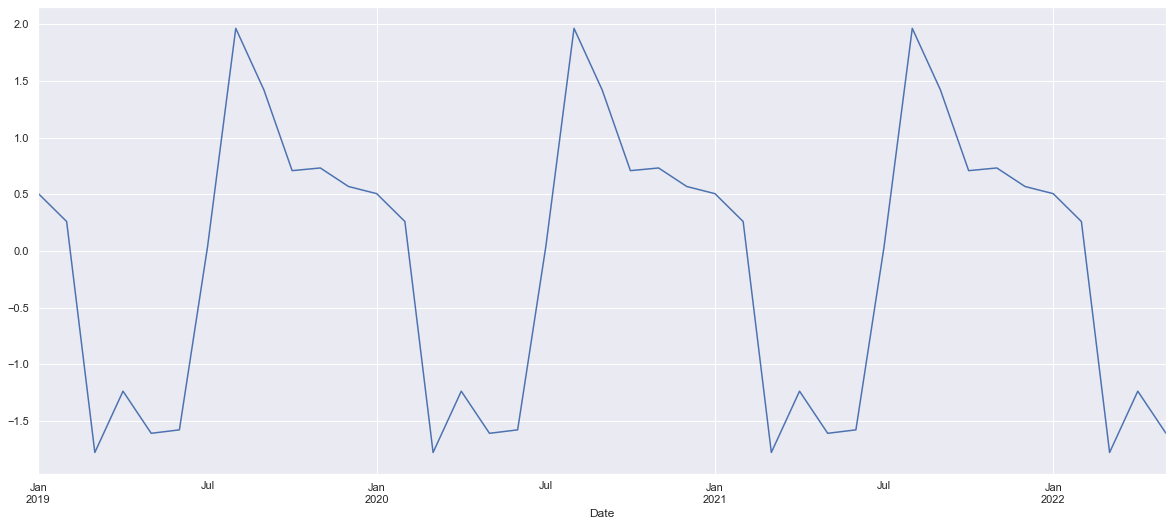

<Figure size 576x576 with 0 Axes>

In [29]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2019':'2022'].plot()
fig = plt.figure(figsize=(8,8))

### Stationarity of Time Series
### Stationarity Test of Time Series

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series has a unit root -It is non-stationary

Alternate Hypothesis : Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [108]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [109]:
ad_fuller_func(monthly_data['Close'])

ADF Statistic: 1.435186
p-value: 0.997268
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

## AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

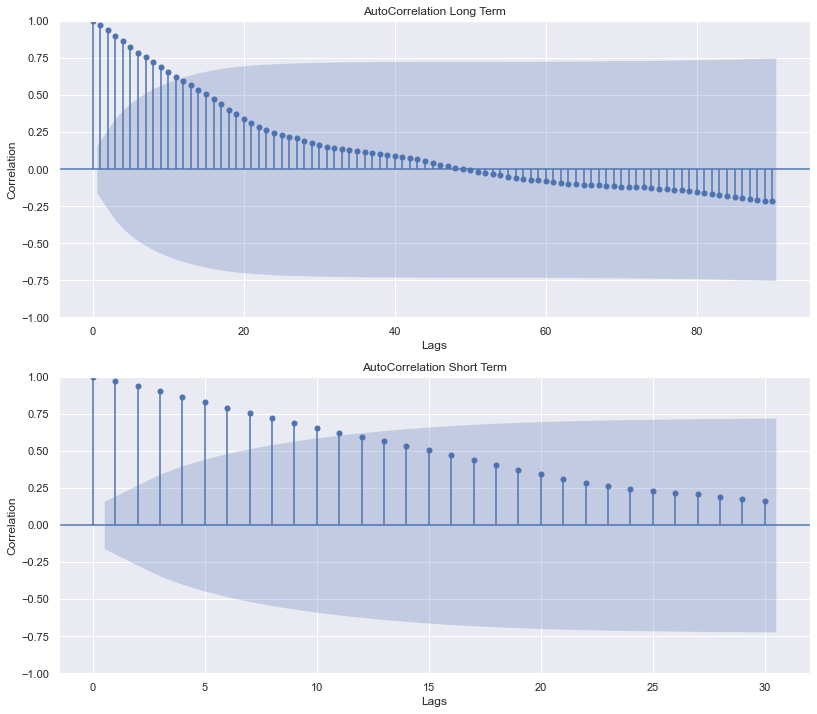

In [110]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

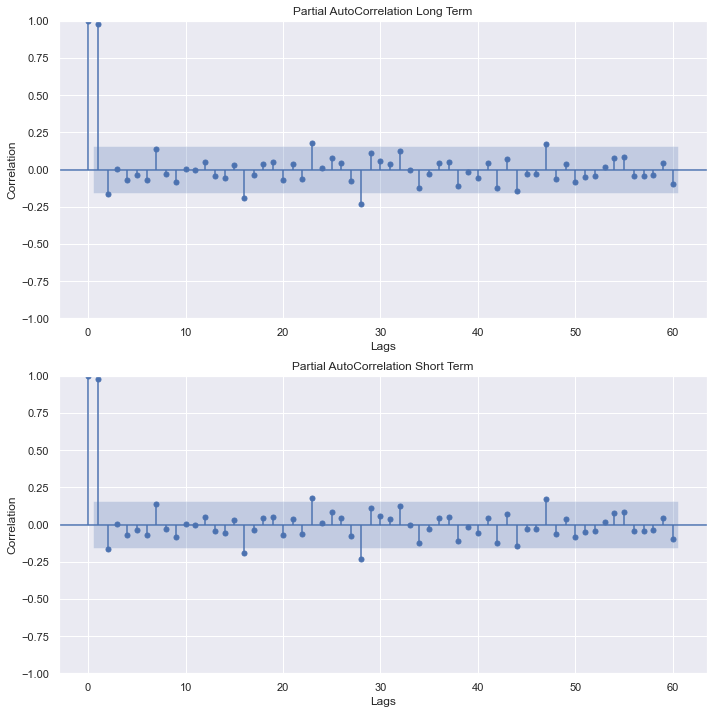

In [111]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Close'],lags=60,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Close'],lags=60,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

Interpreting PACF Plot :-

->Sudden Decay at Lag-1

->Order of series seems AR(1)

### Transformations To Make Series Stationary



In [123]:
##Differencing By 1
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)

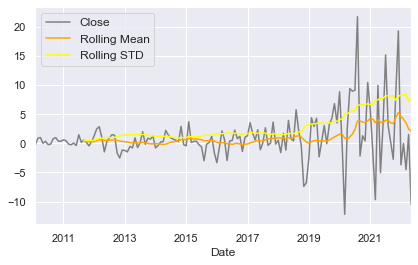

In [124]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .



In [122]:
##Checking if Time Series is Stationary by Running ADF Test
monthly_diff.isna().sum()
monthly_diff.dropna()
ad_fuller_func(monthly_diff[1:])

ADF Statistic: 1.730154
p-value: 0.998200
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Failed to Reject Ho-Time Series is Non-Stationary


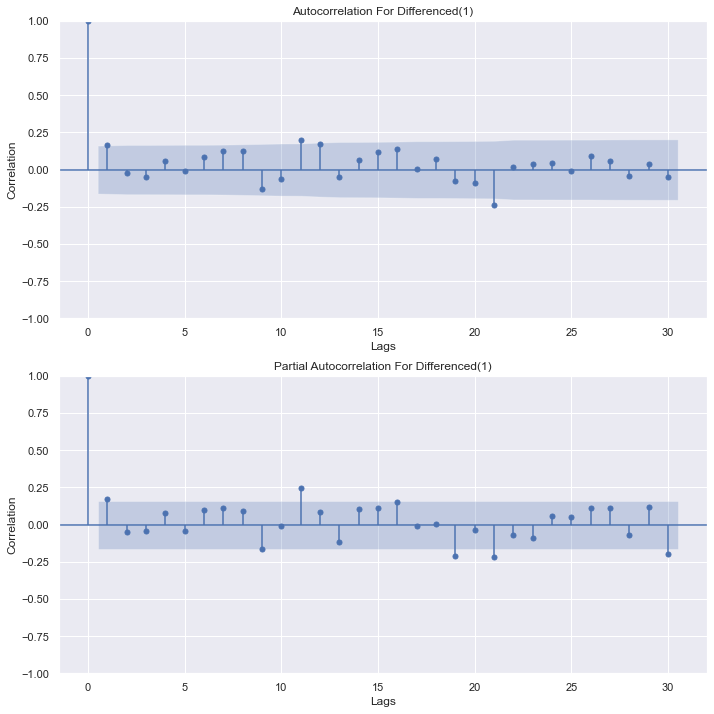

In [132]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary



# Modelling Seasonal ARIMA


In [175]:
modelling_series = monthly_data['Close']
modelling_series.head()

Date
2010-01-31    7.418402
2010-02-28    7.099850
2010-03-31    7.978960
2010-04-30    8.969592
2010-05-31    8.980768
Freq: M, Name: Close, dtype: float64

### Train-Test Split

In [176]:
train,test = split(modelling_series,train_size=0.7,shuffle=False)


In [177]:
train.head()

Date
2010-01-31    7.418402
2010-02-28    7.099850
2010-03-31    7.978960
2010-04-30    8.969592
2010-05-31    8.980768
Freq: M, Name: Close, dtype: float64

In [178]:
test.head()

Date
2018-09-30    55.518421
2018-10-31    55.211413
2018-11-30    47.808929
2018-12-31    41.066579
2019-01-31    38.541548
Freq: M, Name: Close, dtype: float64

In [42]:
print('Train',len(train))
print('Test',len(test))

Train 104
Test 45


In [43]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [44]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .

Parameters for Series already indicate Non-Seasonality Part with Order (1,1,1).

AR(1) derived by the PACF plot

MA(1) derived by the ACF Plot

Differencing(1) derived by differencing and observing stationarity.

### Hyper Parameter Tuning for Model Order


In [45]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:967.6579449749589
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:868.0344062121181
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:663.733221680396
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:630.6287113744036
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:558.3381771597869
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2862.735613647443
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:601.9298645042885
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:470.9434501829
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2203.662183746111
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:607.0587062027674
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:541.8583284473375
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:457.53199928368656
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:564.5152987033896
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:551.2755542646322
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2854.2501992533025
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:496.842132643648
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:463.95206088328683
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2129.0930118828583
ARIMA(0, 0,

Akaike's Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model.

By Observing the Lowest AIC , we come to Seasonality Order of (0, 2, 2, 12)12 and non-seasonal component is (0,2,2) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present. During Fall time period (July-December) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

### Back-Testing Training and Testing Data


Since we cannot use cross validation in our time series based datasets,as it can jumble the datasets during different folds.

This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. We can use backtesting method for time series.

In backtesting we can create multiple train-test splits keeping in mind the temporal order of our data during splits . For example if I have dataset between Jan to Dec

Split - 1 : Train Data (Jan to Aug) + Test Data (Aug to Dec)

Split - 2 : Train Data (Jan to Sept) + Test Data (Sept to Dec)

Split - 3 : Train Daata (Jan to Oct) + Test Data (Oct to Dec) and so on ... We can have multiple splits in our dataset to validate our model rather than just one split like traditional train test splits .

In [168]:
## Using TimeSeriesSplit from sklearn library
%matplotlib inline
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 62
Training Observations: 33
Testing Observations: 29
Observations: 91
Training Observations: 62
Testing Observations: 29
Observations: 120
Training Observations: 91
Testing Observations: 29
Observations: 149
Training Observations: 120
Testing Observations: 29


<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [169]:
#Train and Test different pairs across time series.

train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [170]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(0,2,2),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

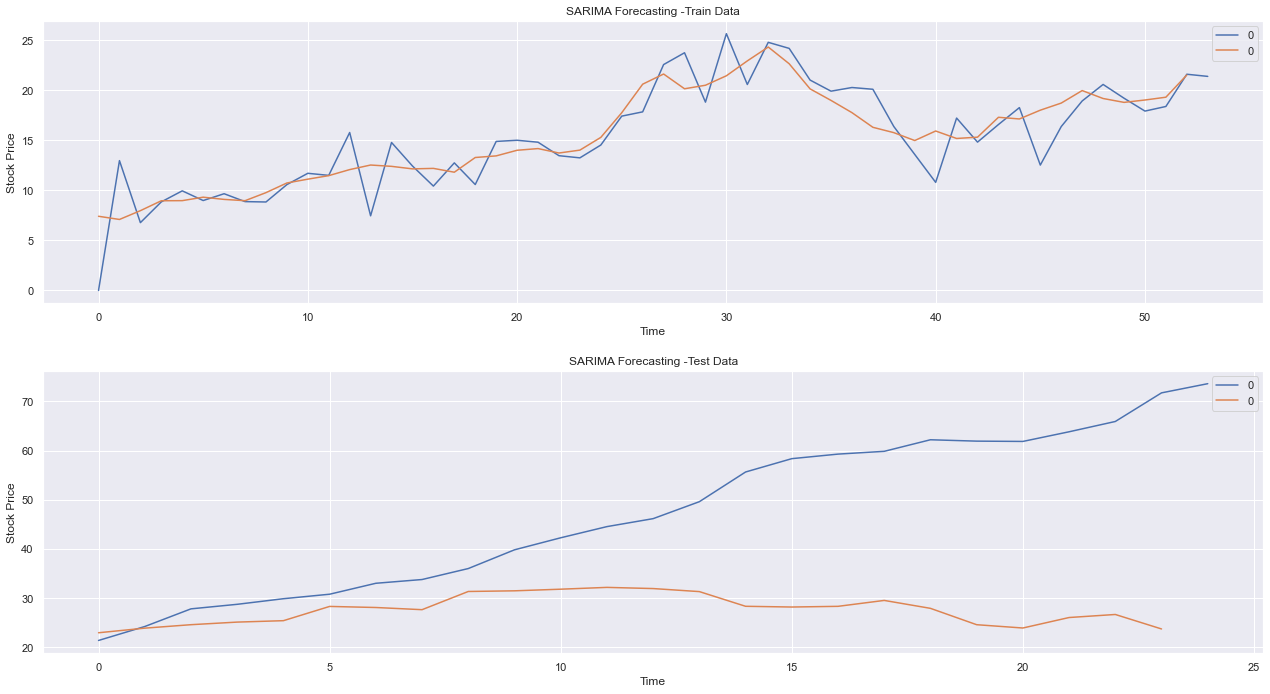

In [171]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

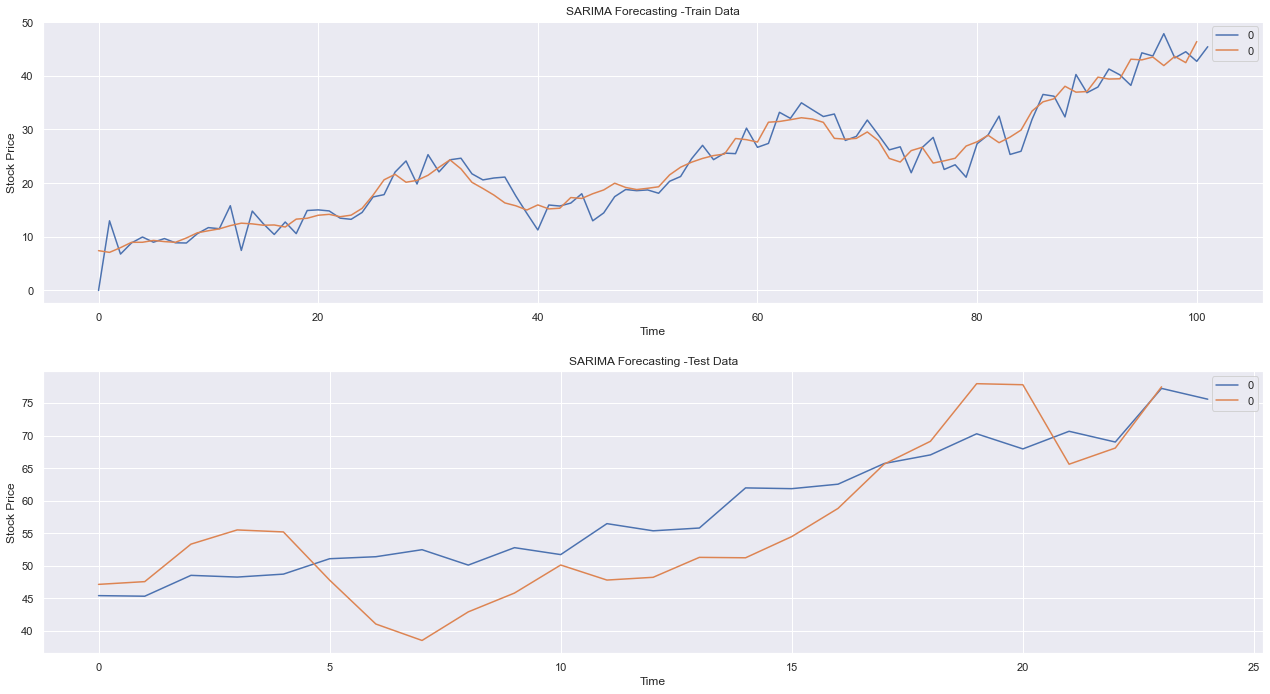

In [172]:
## Backtest Set-2
backtest_model(train_list[4],test_list[4])

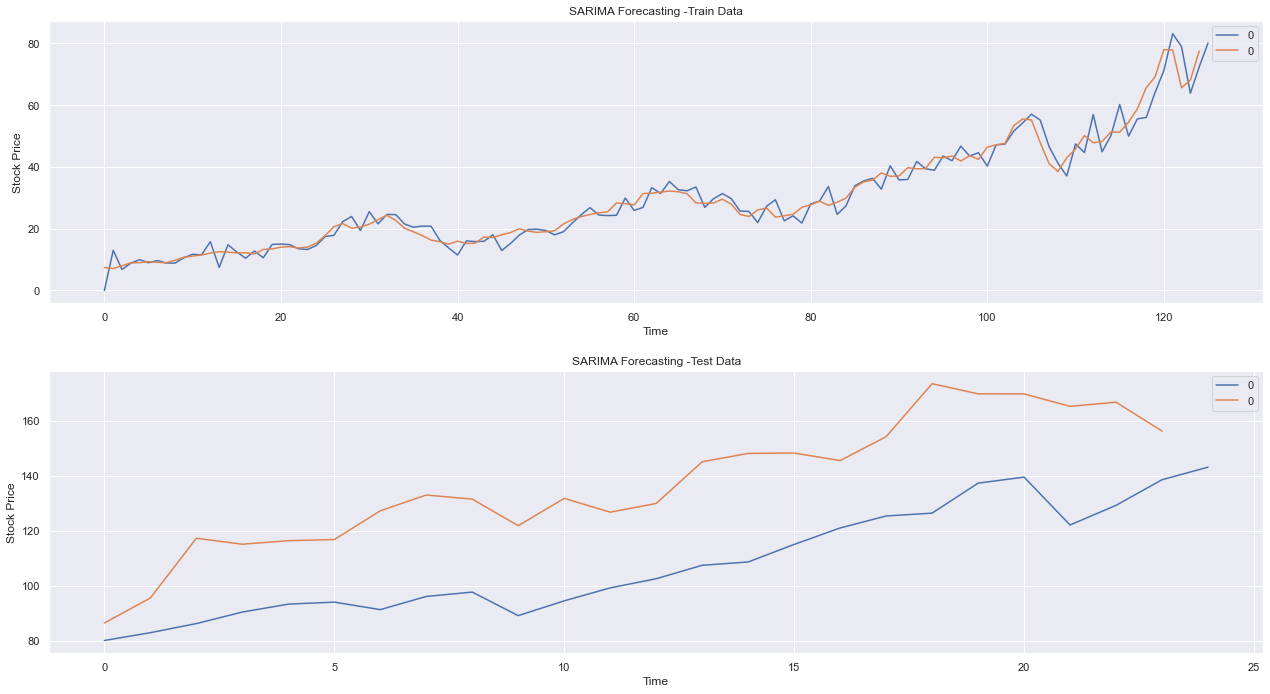

In [173]:
## Backtest Set-3
backtest_model(train_list[5],test_list[5])

By using backtesting we can validate our model on multiple train-test splits. Red is the training set and blue indicates test set.



### Forecasting Seasonal ARIMA


In [180]:
train.tail()

Date
2018-04-30    42.458572
2018-05-31    46.384205
2018-06-30    47.155357
2018-07-31    47.577857
2018-08-31    53.336522
Freq: M, Name: Close, dtype: float64

In [182]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2010-01-31',end='2017-09-30')
forecasts_test = results.predict(start='2017-10-31',end='2022-12-31')

In [183]:
forecasts_test.tail

<bound method NDFrame.tail of 2017-10-31     40.009332
2017-11-30     38.025573
2017-12-31     44.062782
2018-01-31     43.265829
2018-02-28     47.393521
                 ...    
2022-08-31    159.447132
2022-09-30    159.259880
2022-10-31    159.141031
2022-11-30    164.932366
2022-12-31    166.502987
Freq: M, Name: predicted_mean, Length: 63, dtype: float64>

In [184]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),2))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),2))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),2))


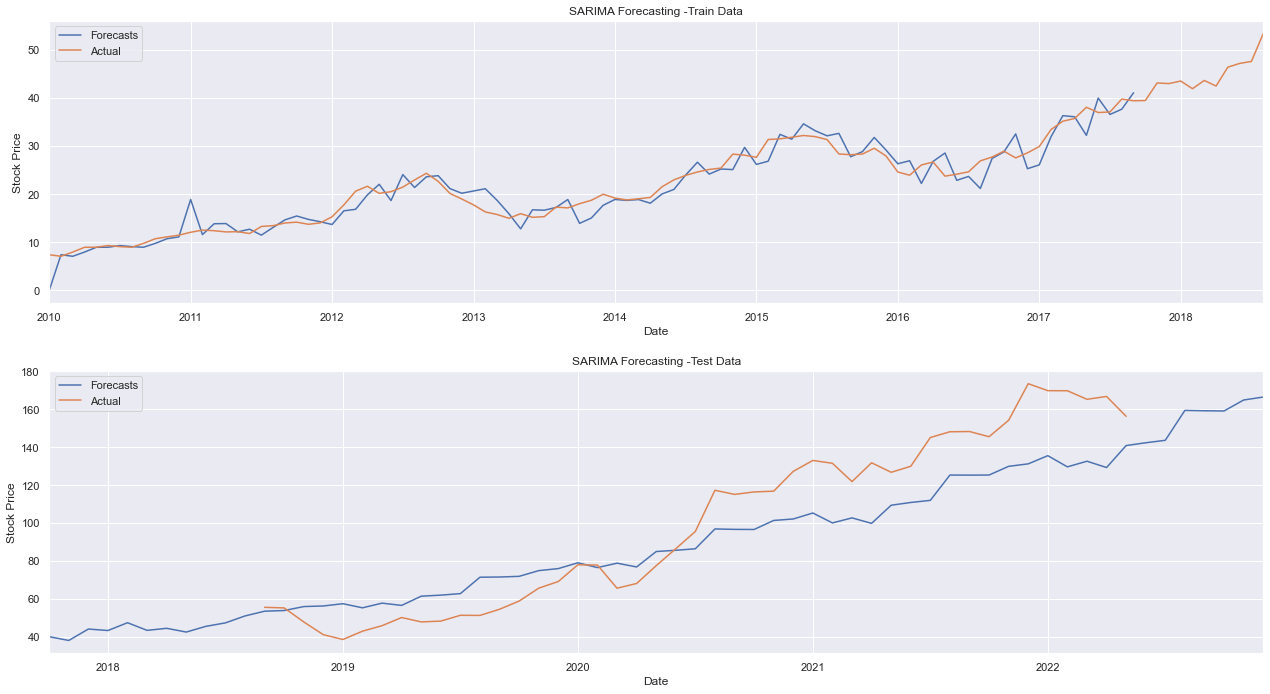

In [185]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [186]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)
forecasts_test = pd.DataFrame(forecasts_test)
forecasts_train = pd.DataFrame(forecasts_train)

In [190]:
#train.drop(train.index[93:81],inplace=True)
#train.head
forecasts_test.drop(forecasts_test.index[45:63],inplace=True)
forecasts_test.head()
#forecasts_train.drop(forecasts_train.index[93:81],inplace=True)
#forecasts_train.head()
#test.drop(test.index[81:91],inplace=True)
#test.tail()

,predicted_mean
2017-10-31,40.009332
2017-11-30,38.025573
2017-12-31,44.062782
2018-01-31,43.265829
2018-02-28,47.393521


In [188]:
train.drop(train.index[93:104],inplace=True)
train.head

<bound method NDFrame.head of                 Close
Date                 
2010-01-31   7.418402
2010-02-28   7.099850
2010-03-31   7.978960
2010-04-30   8.969592
2010-05-31   8.980768
...               ...
2017-05-31  38.056932
2017-06-30  36.957840
2017-07-31  37.074875
2017-08-31  39.755326
2017-09-30  39.402125

[93 rows x 1 columns]>

In [158]:
forecasts_train.drop(forecasts_train.index[63:81],inplace=True)
forecasts_train.tail()

2014-11-30    25.304181
2014-12-31    30.692247
2015-01-31    25.280132
2015-02-28    29.249593
2015-03-31    32.133731
Freq: M, Name: predicted_mean, dtype: float64

In [191]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))

Result Metrics for SARIMA-Train Data
R2 Score :  0.92
Mean Squared Error :  5.66
Mean Absolute Error :  1.76
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.29
Mean Squared Error :  1397.08
Mean Absolute Error :  29.7
None


In [192]:
print(train.shape)
print(forecasts_train.shape)
print(test.shape)
print(forecasts_test.shape)

(93, 1)
(93, 1)
(45, 1)
(45, 1)


In [193]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood                -186.497
Date:                             Mon, 16 May 2022   AIC                            382.995
Time:                                     19:15:23   BIC                            394.842
Sample:                                 01-31-2010   HQIC                           387.741
                                      - 08-31-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0444      0.622     -0.071      0.943      -1.263       1.175
ma.L1          0.2435      

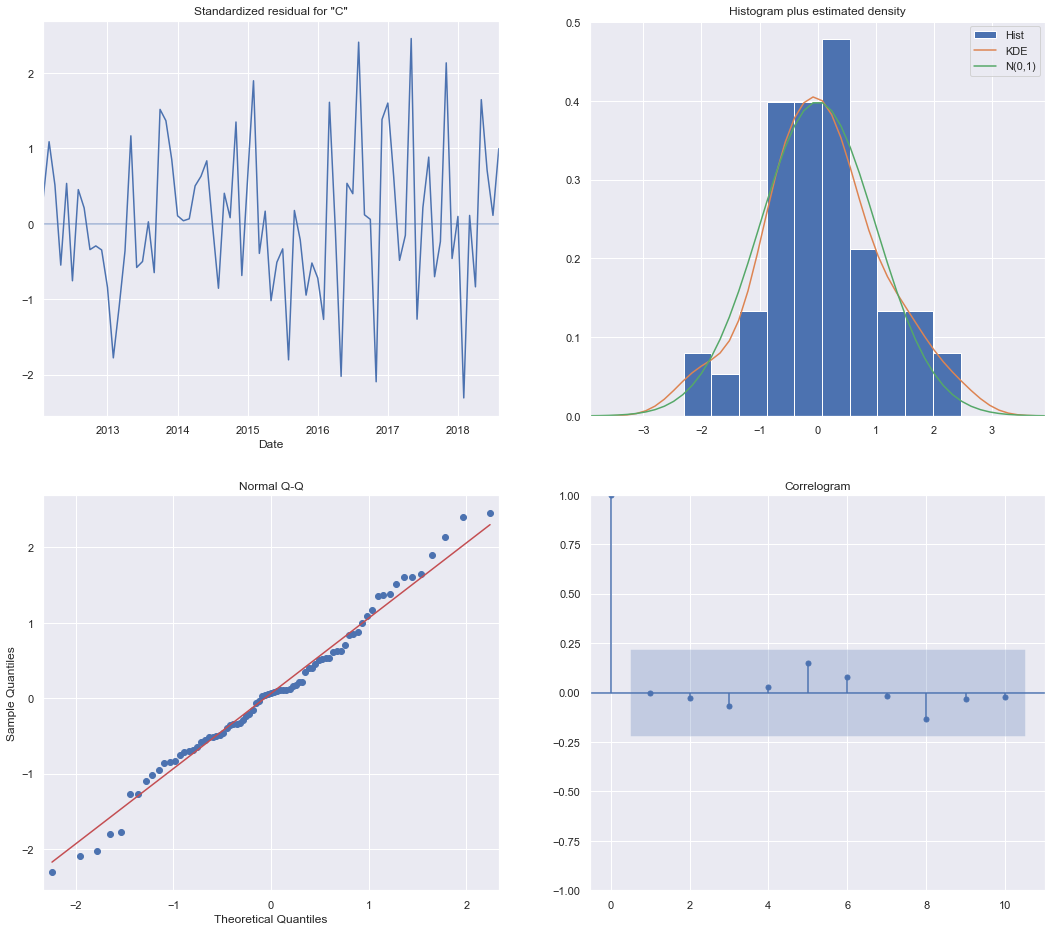

In [196]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.